In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
project_root = Path.cwd().parent.parent  # Assuming notebook is in experiments/notebooks/
sys.path.insert(0, str(project_root))
print(sys.path)
import pandas as pd
import matplotlib.pyplot as plt
from experiments.analysis_utils.data_processing import read_directory
from experiments.analysis_utils.visualization import plot_reaction_speed_distribution, plot_token_distribution

['/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/miniconda3/envs/radCAD/lib/python312.zip', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12/lib-dynload', '', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12/site-packages']


In [3]:
# Read the data
path_to_runs = Path("../../results/simulations/withdrawal_queue_replacement_attacker_share_study/")
print(path_to_runs.resolve())
print(path_to_runs.resolve().exists())
proposal_df_full, start_data_df_full, timestep_data_df_full = read_directory(path_to_runs.resolve())

/home/rotsker/PycharmProjects/dg-research-revision/results/simulations/withdrawal_queue_replacement_attacker_share_study
True


In [4]:
from experiments.analysis_utils.metrics import analyze_veto_timing_by_seals

veto_stats = analyze_veto_timing_by_seals(timestep_data_df_full, start_data_df_full, additional_columns=('attacker_share',))
veto_stats['attack_success_rate'] = 100 - veto_stats['veto_rate']
veto_stats['n_successful_attacks'] = veto_stats['attack_success_rate'] / 100 * veto_stats['total_runs']
print("Veto statistics by seal parameters:")
display(veto_stats)

# Example for specific seal values
# veto_seal = 0.01
# rage_seal = 0.1
# attacker_share = veto_stats.index.get_level_values('attacker_share').unique()[0]
# specific_stats = veto_stats.loc[veto_seal, rage_seal, attacker_share]
# print(f"\nStatistics for veto_seal={veto_seal}, rage_seal={rage_seal}, attacker_share={attacker_share:.4f}:")
# print(f"Veto rate: {specific_stats['veto_rate']:.1f}%")
# print(f"Mean time to veto: {specific_stats['mean_time_to_veto']:.2f}")
# print(f"Median time to veto: {specific_stats['median_time_to_veto']:.2f}")
# print(f"Total runs: {specific_stats['total_runs']}")

# veto_stats.to_csv("veto_stats.csv")

Veto statistics by seal parameters:


veto_rate  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share               
0.01                         0.1                           0.25            100.000000   
                                                           0.30            100.000000   
                                                           0.35             98.673469   
                                                           0.40             89.081633   
                                                           0.45             59.285714   
                                                           0.50             18.163265   
                                                           0.55              0.510204   

                                                                           mean_time_to_veto  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                      
0.01                         0.1                           0.25                    28.940000   
                                                           0.30                    30.013913   
                                                           0.35                    31.478800   
                                                           0.40                    33.247423   
                                                           0.45                    35.153184   
                                                           0.50                    37.106742   
                                                           0.55                    37.800000   

                                                                           median_time_to_veto  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                        
0.01                         0.1                           0.25                           29.0   
                                                           0.30                           30.0   
                                                           0.35                           31.0   
                                                           0.40                           33.0   
                                                           0.45                           35.0   
                                                           0.50                           37.0   
                                                           0.55                           37.0   

                                                                           hours_mean_time_to_veto_hours  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                                  
0.01                         0.1                           0.25                                86.820000   
                                                           0.30                                90.041739   
                                                           0.35                                94.436401   
                                                           0.40                                99.742268   
                                                           0.45                               105.459552   
                                                           0.50                               111.320225   
                                                           0.55                               113.400000   

                                                                           hours_median_time_to_veto_hours  \
first_seal_rage_quit_support second_seal_rage_quit_support attacker_share                                    
0.01                         0.1                           0.25                                       87.0   
                                                           0.30                                       90.0   
                                                           0.35                                       93.0   
   

/home/rotsker/PycharmProjects/dg-research-revision/experiments/analysis_utils/visualization.py:351: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  current_values = plt.gca().get_yticks()
/home/rotsker/PycharmProjects/dg-research-revision/experiments/analysis_utils/visualization.py:353: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  


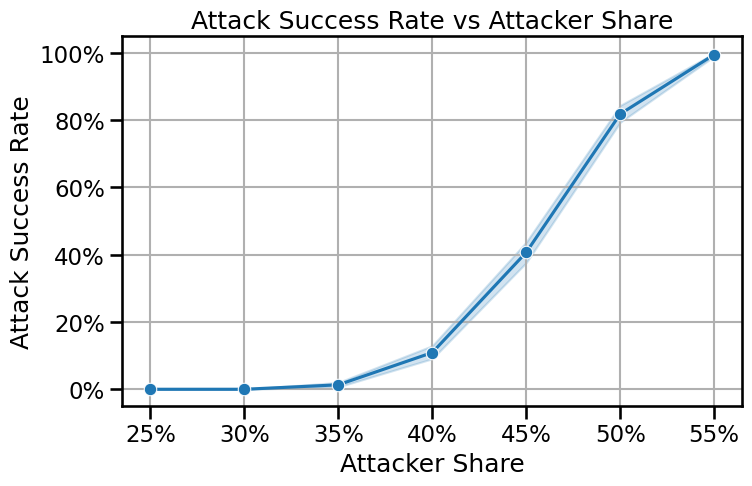

In [12]:
from experiments.analysis_utils.visualization import plot_attack_success_rate
plot_attack_success_rate(timestep_data_df_full, start_data_df_full)

/home/rotsker/PycharmProjects/dg-research-revision/experiments/analysis_utils/visualization.py:452: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.grid(True)


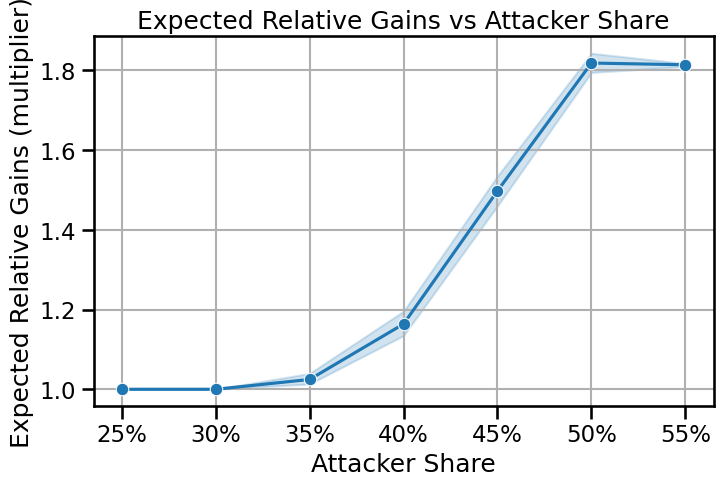

In [129]:
from experiments.analysis_utils.visualization import plot_expected_attacker_gains
plot_expected_attacker_gains(timestep_data_df_full, start_data_df_full)


# Marginal costs (of 5% and 10% attack success)

In [13]:
from experiments.analysis_utils.metrics import calculate_time_to_first_veto
veto_times = calculate_time_to_first_veto(timestep_data_df_full)
    
# Merge with start data to get attacker share
analysis_df = veto_times.merge(
    start_data_df_full[['run_id', 'attacker_share']], 
    on='run_id'
)

# Mark runs as successful (no veto) or failed (veto occurred)
analysis_df['attack_succeeded'] = analysis_df['time_to_first_veto'].isna()
analysis_df['attack_success_binary'] = analysis_df['attack_succeeded'].astype(int) * 100

analysis_df.groupby('attacker_share')['attack_success_binary'].mean()

attacker_share
0.25     0.000000
0.30     0.000000
0.35     1.326531
0.40    10.918367
0.45    40.714286
0.50    81.836735
0.55    99.489796
Name: attack_success_binary, dtype: float64

Marginal cost for each additional 5% of success rate:
(how much additional attacker share is needed for 5% increase in success rate)

success_rate | required_share | marginal_cost
--------------------------------------------------
          0% |         0.00% |       36.91%
          5% |        36.91% |        2.61%
         10% |        39.52% |        1.16%
         15% |        40.68% |        0.84%
         20% |        41.52% |        0.84%
         25% |        42.36% |        0.84%
         30% |        43.20% |        0.84%
         35% |        44.04% |        0.84%
         40% |        44.88% |        0.64%
         45% |        45.52% |        0.61%
         50% |        46.13% |        0.61%
         55% |        46.74% |        0.61%
         60% |        47.34% |        0.61%
         65% |        47.95% |        0.61%
         70% |        48.56% |        0.61%
         75% |        49.17% |        0.61%
         80% |        49.78% |        1.12%
         85% |       

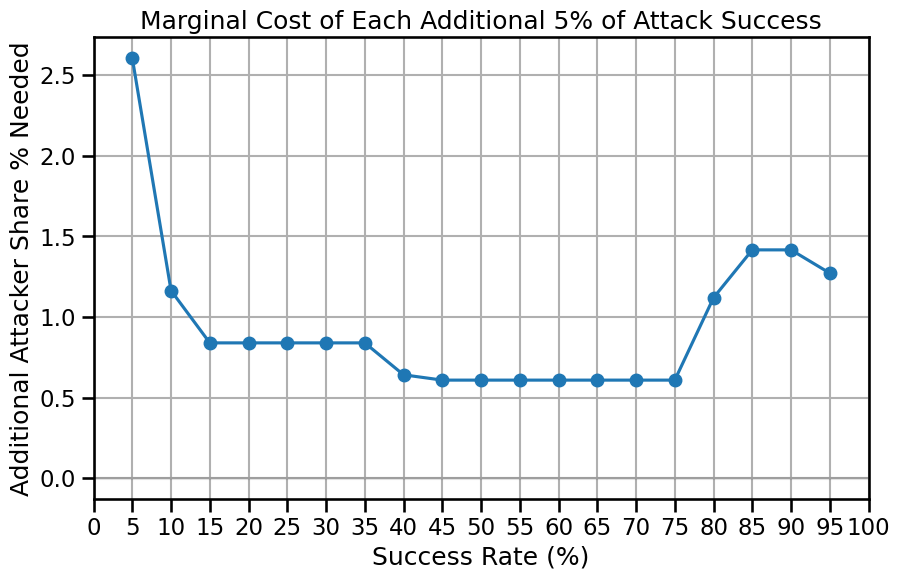

In [130]:
import numpy as np
from scipy.interpolate import interp1d

# Get success rates by attacker share
success_by_share = analysis_df.groupby('attacker_share')['attack_success_binary'].mean()

# Create inverse function mapping success rate to attacker share
# Note: we need to ensure success rates are strictly increasing for interpolation
success_rate = success_by_share.values
attacker_shares = success_by_share.index.values

# Create interpolation function
inverse_function = interp1d(success_rate, attacker_shares, kind='linear', bounds_error=False, fill_value=(attacker_shares[0], attacker_shares[-1]))

# Generate points for each percent of success
step_percent = 5
success_percents = np.arange(step_percent, 101, step_percent)  # 0% to 100%
required_shares = inverse_function(success_percents)

# Calculate marginal costs
marginal_costs = np.diff(required_shares) * 100  # *100 to express as percentage points

print(f"Marginal cost for each additional {step_percent}% of success rate:")
print(f"(how much additional attacker share is needed for {step_percent}% increase in success rate)")
print("\nsuccess_rate | required_share | marginal_cost")
print("-" * 50)

# Adjust for the first positive probability
success_percents = np.insert(success_percents, 0, 0)
marginal_costs = np.insert(marginal_costs, 0, required_shares[0] * 100)
required_shares = np.insert(required_shares, 0, 0)

for i in range(len(marginal_costs)):
    print(f"{success_percents[i]:>11.0f}% | {required_shares[i]*100:>12.2f}% | {marginal_costs[i]:>11.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(success_percents[1:-1], marginal_costs[1:], marker='o')
plt.xlabel('Success Rate (%)')
plt.ylabel('Additional Attacker Share % Needed')
plt.title(f'Marginal Cost of Each Additional {step_percent}% of Attack Success')
plt.grid(True)
plt.xticks(success_percents, rotation=0)
plt.xlim(success_percents[0], success_percents[-1])

# Optional: Add some styling for better readability
plt.axhline(y=0, color='k', linestyle='-', alpha=0.1)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.1);

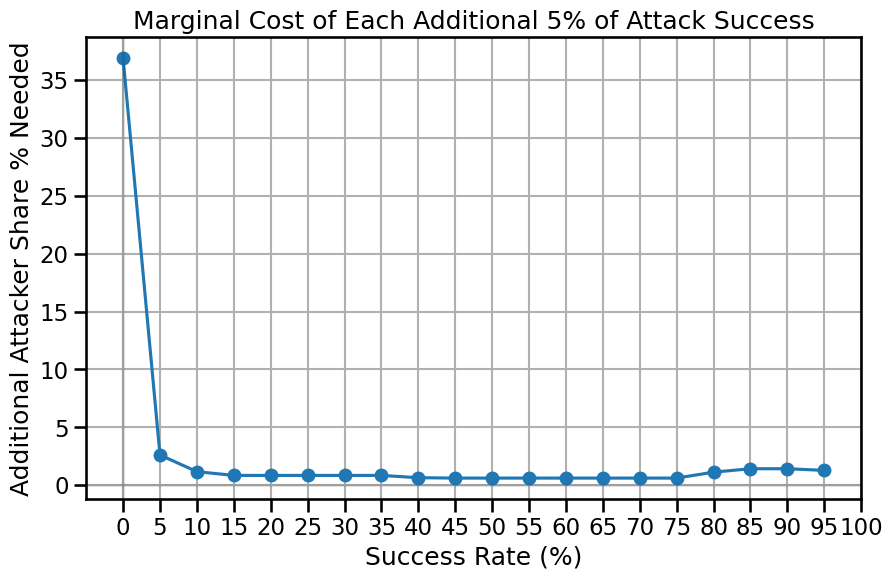

In [131]:
plt.figure(figsize=(10, 6))
plt.plot(success_percents[:-1], marginal_costs, marker='o')
plt.xlabel('Success Rate (%)')
plt.ylabel('Additional Attacker Share % Needed')
plt.title(f'Marginal Cost of Each Additional {step_percent}% of Attack Success')
plt.grid(True)
plt.xticks(success_percents, rotation=0)
plt.xlim(success_percents[0]-5, success_percents[-1])

# Optional: Add some styling for better readability
plt.axhline(y=0, color='k', linestyle='-', alpha=0.1)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.1);

Marginal cost for each additional 10% of success rate:
(how much additional attacker share is needed for 10% increase in success rate)

success_rate | required_share | marginal_cost
--------------------------------------------------
          0% |         0.00% |       39.52%
         10% |        39.52% |        2.00%
         20% |        41.52% |        1.68%
         30% |        43.20% |        1.68%
         40% |        44.88% |        1.25%
         50% |        46.13% |        1.22%
         60% |        47.34% |        1.22%
         70% |        48.56% |        1.22%
         80% |        49.78% |        2.54%
         90% |        52.31% |        2.69%


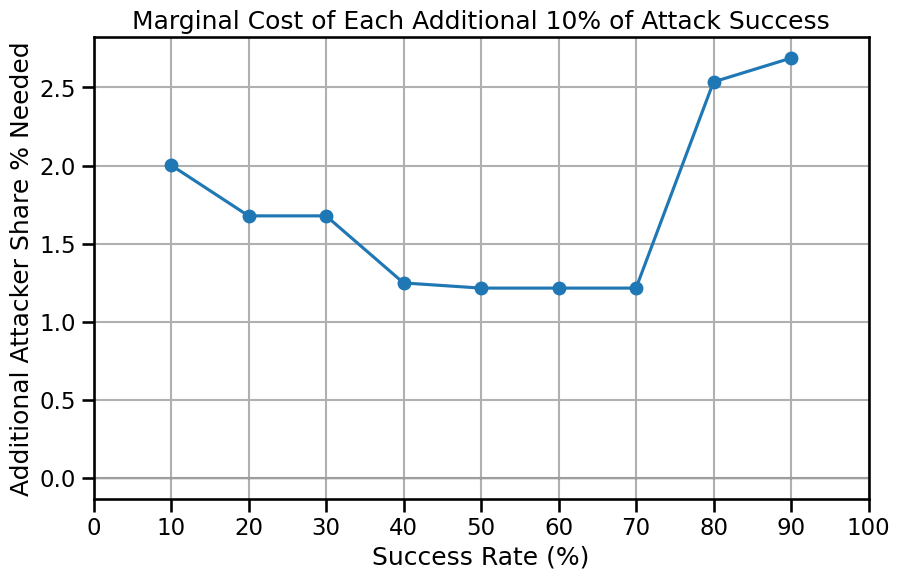

In [132]:
# Generate points for each percent of success
step_percent = 10
success_percents = np.arange(step_percent, 101, step_percent)  # 0% to 100%
required_shares = inverse_function(success_percents)

# Calculate marginal costs
marginal_costs = np.diff(required_shares) * 100  # *100 to express as percentage points

print(f"Marginal cost for each additional {step_percent}% of success rate:")
print(f"(how much additional attacker share is needed for {step_percent}% increase in success rate)")
print("\nsuccess_rate | required_share | marginal_cost")
print("-" * 50)

# Adjust for the first positive probability
success_percents = np.insert(success_percents, 0, 0)
marginal_costs = np.insert(marginal_costs, 0, required_shares[0] * 100)
required_shares = np.insert(required_shares, 0, 0)

for i in range(len(marginal_costs)):
    print(f"{success_percents[i]:>11.0f}% | {required_shares[i]*100:>12.2f}% | {marginal_costs[i]:>11.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(success_percents[1:-1], marginal_costs[1:], marker='o')
plt.xlabel('Success Rate (%)')
plt.ylabel('Additional Attacker Share % Needed')
plt.title(f'Marginal Cost of Each Additional {step_percent}% of Attack Success')
plt.grid(True)
plt.xticks(success_percents, rotation=0)
plt.xlim(success_percents[0], success_percents[-1])

# Optional: Add some styling for better readability
plt.axhline(y=0, color='k', linestyle='-', alpha=0.1)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.1);

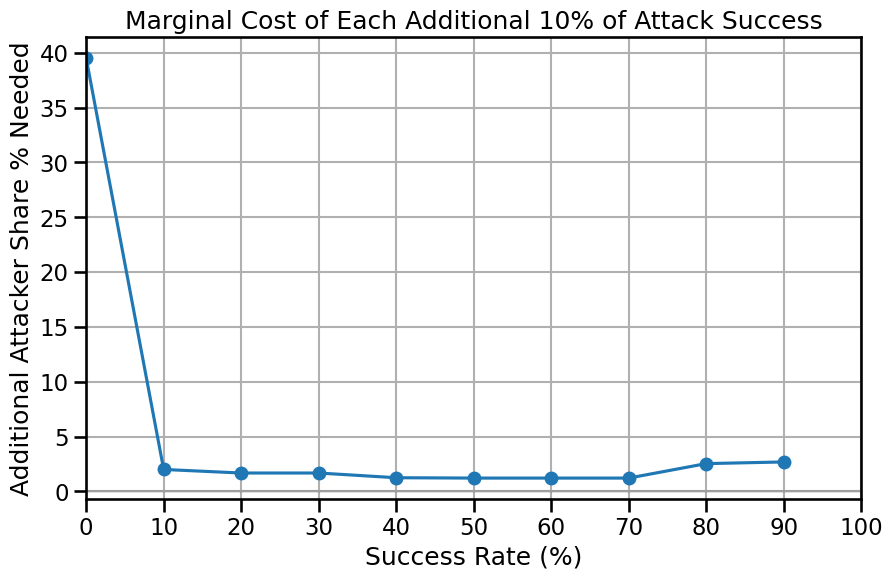

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(success_percents[:-1], marginal_costs, marker='o')
plt.xlabel('Success Rate (%)')
plt.ylabel('Additional Attacker Share % Needed')
plt.title(f'Marginal Cost of Each Additional {step_percent}% of Attack Success')
plt.grid(True)
plt.xticks(success_percents, rotation=0)
plt.xlim(success_percents[0], success_percents[-1])

# Optional: Add some styling for better readability
plt.axhline(y=0, color='k', linestyle='-', alpha=0.1)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.1);

### End of analysis ###